# AIML CA2 PART A

#

# Project Done By : 
## Tan Eu Zin
## P2415927
## DAAA/FT/1B/03

#

# Background : 
*Using the Energy Consumption Dataset to train time series models and forecast theconsumption of gas, electricity and water for the next 60 months.*

#

# IMPORTS

In [166]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import ParameterGrid

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# import models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

#

# LOADING DATASET

In [131]:
# loading the dataset as dataset
dataset = pd.read_csv('CA2-Energy-Consumption-Data.csv')

#

# OBSERVING DATASET

In [132]:
# viewing dataset info 
print('Dataset info : ')
dataset.info()

Dataset info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DATE                           397 non-null    object 
 1   Gas Consumption (tons)         397 non-null    float64
 2   Electricity Consumption (MWh)  397 non-null    float64
 3   Water Consumption (tons)       397 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.5+ KB


In [133]:
# viewing dataset size 
print('Amount of data (rows x columns) : ', dataset.shape)
# 397 columns with 4 rows

Amount of data (rows x columns) :  (397, 4)


In [134]:
# display dataset statistics 
dataset.describe()

,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
count,397.000000,397.000000,397.000000
mean,23.785139,888.472544,484.953652
std,4.903452,153.877594,133.908863
min,11.600000,553.200000,44.400000
25%,20.200000,771.100000,384.400000
50%,23.500000,897.800000,487.400000
75%,27.900000,1005.200000,580.200000
max,46.000000,1294.000000,811.000000


In [135]:
# checking first 5 rows of dataset 
dataset.head()

,DATE,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
0,1/1/1990,18.0,725.1,548.8
1,1/2/1990,15.8,706.7,640.7
2,1/3/1990,17.3,624.5,511.1
3,1/4/1990,18.9,574.7,515.3
4,1/5/1990,22.0,553.2,488.4


#

# PREPPING DATASET FOR USE

In [136]:
# checking for missing values 
dataset.isnull().sum()
# no need to deal with missing data

DATE                             0
Gas Consumption (tons)           0
Electricity Consumption (MWh)    0
Water Consumption (tons)         0
dtype: int64

In [137]:
# converting the date column into datetime format 
dataset['DATE'] = pd.to_datetime(dataset['DATE'], format='%d/%m/%Y')

# set the index of the dataset to the newly converted date
dataset.set_index('DATE', inplace = True)

# viewing changes
dataset.head()

# dataset can be used now

,Gas Consumption (tons),Electricity Consumption (MWh),Water Consumption (tons)
DATE,,,
1990-01-01,18.0,725.1,548.8
1990-02-01,15.8,706.7,640.7
1990-03-01,17.3,624.5,511.1
1990-04-01,18.9,574.7,515.3
1990-05-01,22.0,553.2,488.4


#

# PLOTTING GRAPHS TO OBSERVE DATASET

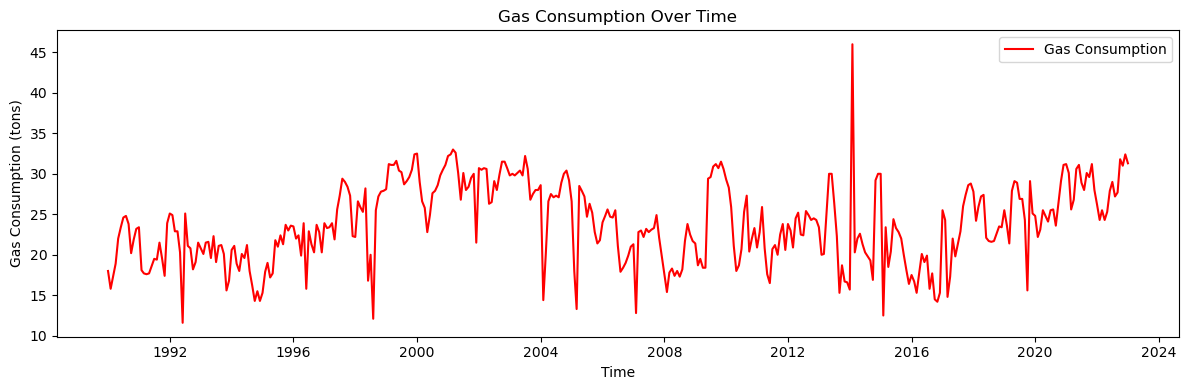

In [138]:
# plot gas consumption over time

# setting figure size 
plt.figure(figsize=(12, 4))  

# plotting the gas consumption
plt.plot(dataset.index, dataset['Gas Consumption (tons)'], label='Gas Consumption', color='r')

# labels
plt.title('Gas Consumption Over Time')
plt.ylabel('Gas Consumption (tons)')
plt.xlabel('Time')  

# plotting
plt.legend()  
plt.tight_layout()
plt.show()

# graph shows lots of fluctuations throughout the years, with a very obvious spike at about 2014
# increasing trend after 2016

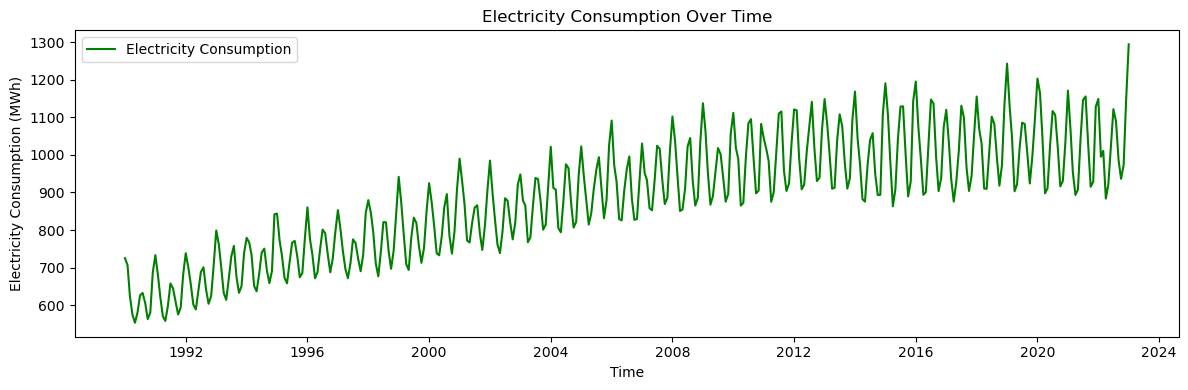

In [139]:
# plot electricity consumption over time

# setting figure size 
plt.figure(figsize=(12, 4))  

# plotting the gas consumption
plt.plot(dataset.index, dataset['Electricity Consumption (MWh)'], label='Electricity Consumption', color='g')

# labels
plt.title('Electricity Consumption Over Time')
plt.ylabel('Electricity Consumption (MWh)')
plt.xlabel('Time')  

# plotting
plt.legend()  
plt.tight_layout()
plt.show()

# multiple mountain like shapes suggest seasonal trend
# also has an increasing trend

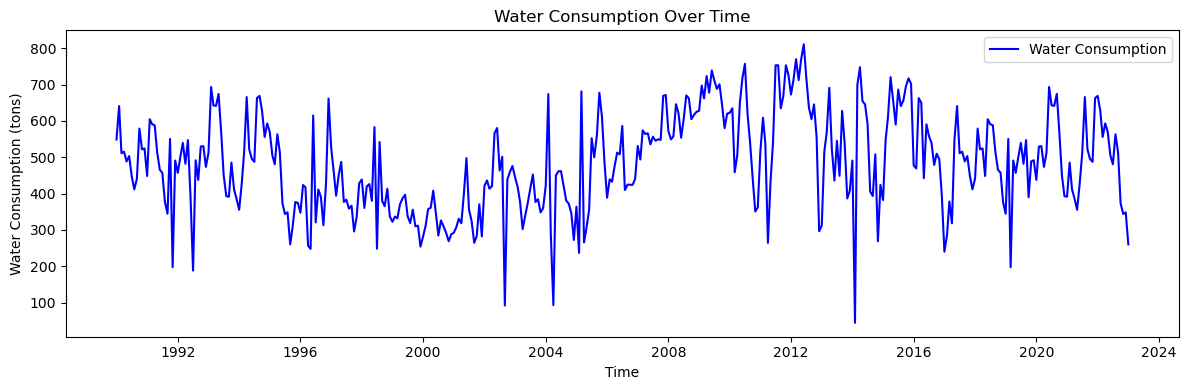

In [140]:
# plot water consumption over time

# setting figure size 
plt.figure(figsize=(12, 4))  

# plotting the gas consumption
plt.plot(dataset.index, dataset['Water Consumption (tons)'], label='Water Consumption', color='b')

# labels
plt.title('Water Consumption Over Time')
plt.ylabel('Water Consumption (tons)')
plt.xlabel('Time')  

# plotting
plt.legend()  
plt.tight_layout()
plt.show()

# lots of fluctuations with no clear trend


#

# CHECK IF DATA IS STATIONARY

In [141]:
# checking if data is stationary using summary statistics

# defining consumption_types
consumption_types = ['Gas Consumption (tons)', 'Electricity Consumption (MWh)', 'Water Consumption (tons)']

# for loop to print statistics
for consumption_type in consumption_types:
    
    # middle index for the center where dataset is divided
    mid_index = len(dataset) // 2

    # defining groups 1 and 2
    X1 = dataset.iloc[:mid_index, dataset.columns.get_loc(consumption_type)]
    X2 = dataset.iloc[mid_index:, dataset.columns.get_loc(consumption_type)]

    # print results
    print(f'For {consumption_type}, group 1 mean = {X1.mean():.2f}, group 2 mean = {X2.mean():.2f}, \ngroup 1 variance = {X1.var():.2f}, group 2 variance = {X2.var():.2f}\n')

# since group 1 and group 2 means and variances are not equal for all 3 columns, 
# we can conclude that this dataset is not a stationary dataset
# using this method has room for errors so we use the ADF test

For Gas Consumption (tons), group 1 mean = 24.28, group 2 mean = 23.29, 
group 1 variance = 24.48, group 2 variance = 23.23

For Electricity Consumption (MWh), group 1 mean = 774.04, group 2 mean = 1002.33, 
group 1 variance = 12208.96, group 2 variance = 9083.62

For Water Consumption (tons), group 1 mean = 426.87, group 2 mean = 542.75, 
group 1 variance = 13118.77, group 2 variance = 16079.41



In [142]:
# checking if the data is stationary using Augmented Dickey-Fuller Test

for consumption_type in consumption_types:
    result = adfuller(dataset[consumption_type])
    print(f'Augmented Dickey-Fuller test for {consumption_type}:')
    print(f'--> p-value = {result[1]:.4f}\n')

# since the p-values of both gas and water consumption is < 0.05, these two columns are statoinary 
# electricity consumption column is non-stationary 

Augmented Dickey-Fuller test for Gas Consumption (tons):
--> p-value = 0.0108

Augmented Dickey-Fuller test for Electricity Consumption (MWh):
--> p-value = 0.1862

Augmented Dickey-Fuller test for Water Consumption (tons):
--> p-value = 0.0001



#

# DIFFERENCING FOR NON-STATIONARY COLUMNS

ADF test for Electricity Consumption (MWh) (after differencing): P-value: 0.000000


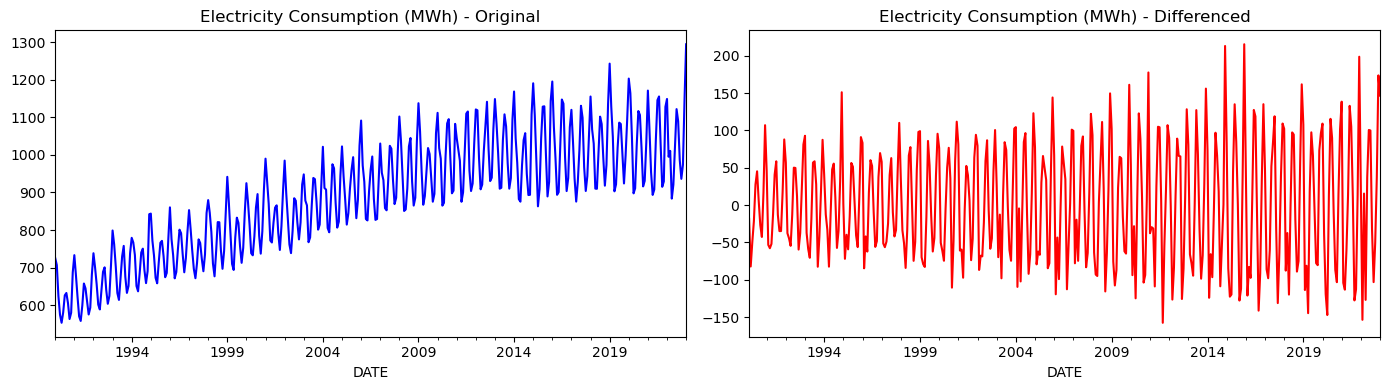

Electricity Consumption became stationary after differencing.


In [143]:
# function to check and plot 
def check_and_plot_electricity(series, label):

    # calculate differenced series
    differenced_series = series.diff().dropna()  

    # ADF test after differencing
    p_after = adfuller(differenced_series)[1]  

    print(f'ADF test for {label} (after differencing): P-value: {p_after:.6f}')

    # create two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))  

    # plot original series
    series.plot(ax=axes[0], color='blue', title=f'{label} - Original')  

    # plot differenced series
    differenced_series.plot(ax=axes[1], color='red', title=f'{label} - Differenced')  

    # plotting
    plt.tight_layout()
    plt.show()

    # return p-value after differencing
    return p_after  

# defining electricity_series
electricity_series = dataset['Electricity Consumption (MWh)']

# use function to check and plot
p_after_elec = check_and_plot_electricity(electricity_series, 'Electricity Consumption (MWh)')

# interpretation of whether column has became stationary
if p_after_elec < 0.05:
    print("Electricity Consumption became stationary after differencing.")
else:
    print("Electricity Consumption remains non-stationary after differencing.")

#

# DATA DECOMPOSITION


 Gas Consumption (tons)  :


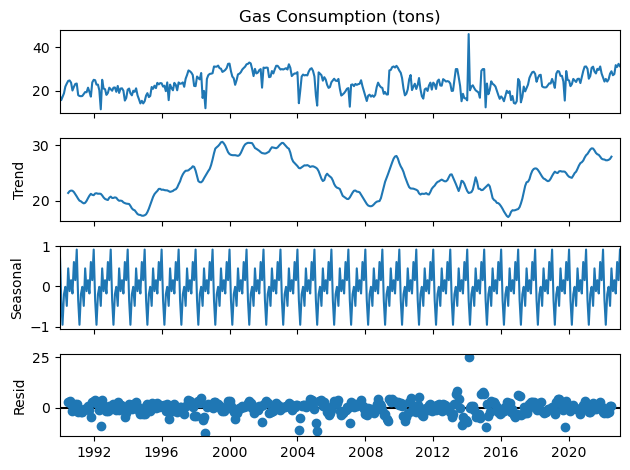


 Electricity Consumption (MWh)  :


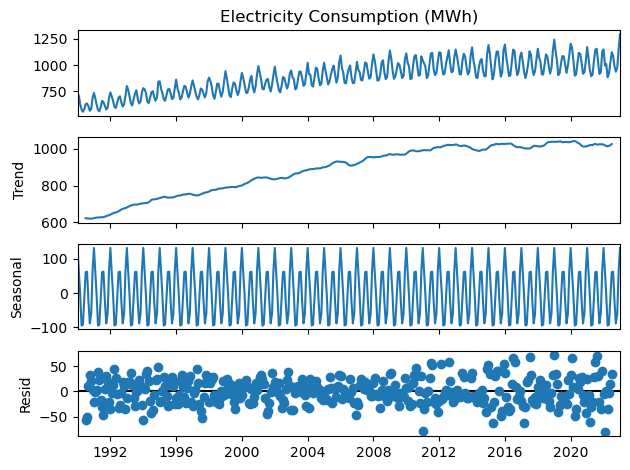


 Water Consumption (tons)  :


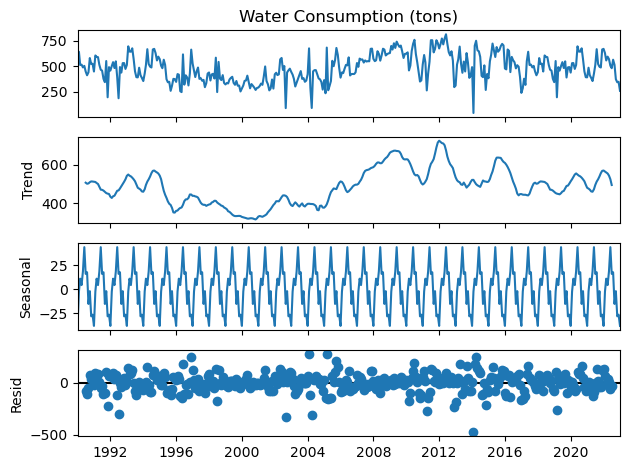

In [144]:
# seasonal decomposition on all three columns of data
for col in dataset:
    print('\n', col, ' :')
    result = seasonal_decompose(dataset[col], model='additive')
    result.plot()
    plt.show()

# seasonal decomposition is chosen to view the seasonality, trend and residuals
# all 3 columns of data have seasonality
# in the gas consumption column, theres an outlier 
# electricity consumption column shows an increasing trend while the others show a fluctuating and unpredictable trend

#

# TIME SERIES MODELS 

## 1) ARIMA : It simplifies the crucial step of finding the best SARIMAX model orders.
## 2) SARIMAX : Accounts for repeating patterns in time series data, can model data that needs differencing to become stationary and incorporates other variables that might affect the time series which is generally good.
## 3) Holt Winters : Exponential smoothing is another good option for data with trend and seasonality. The Holt-Winters method is a specific type of exponential smoothing that handles both.

#

# FITTING MODELS :

#

# ARIMA


MAPE for Gas Consumption (tons): 18.48%
RMSE for Gas Consumption (tons): 5.47


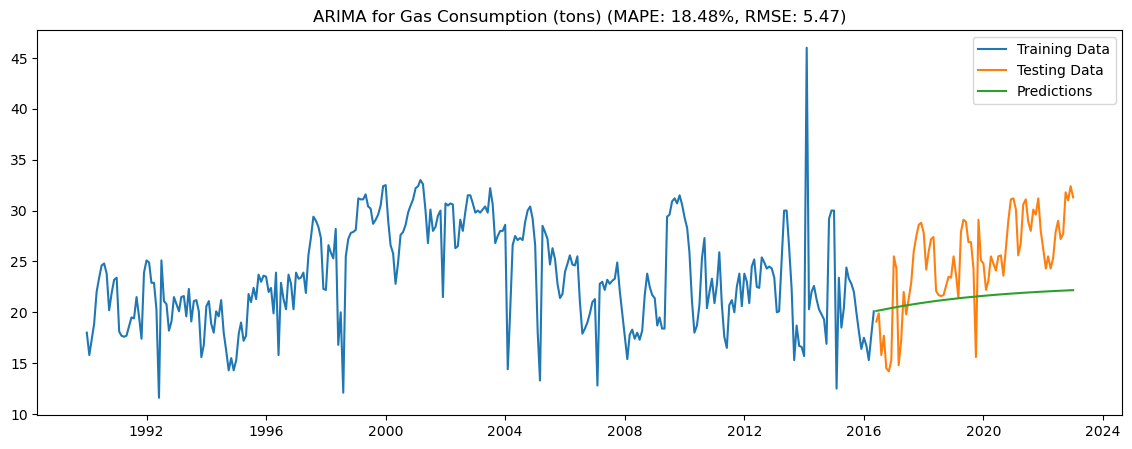


MAPE for Electricity Consumption (MWh): 15.89%
RMSE for Electricity Consumption (MWh): 195.31


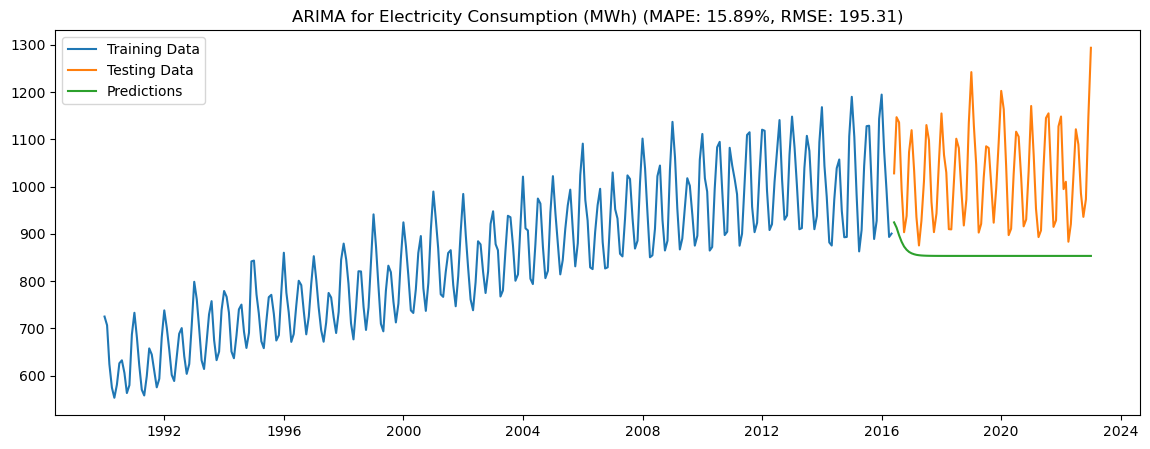


MAPE for Water Consumption (tons): 20.90%
RMSE for Water Consumption (tons): 109.86


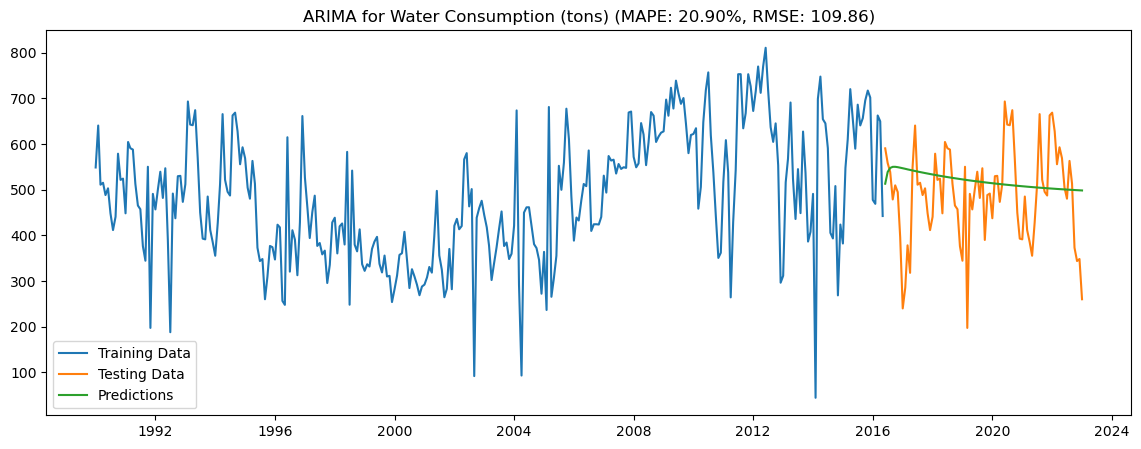

In [149]:
# for loop to iterate through each column in the dataset and fit model
for row in dataset.columns:  
    
    # split the data into training and testing sets (80/20 split)
    split_index = int(len(dataset) * 0.8)
    train_data = dataset.iloc[:split_index][row]
    test_data = dataset.iloc[split_index:][row]

    # fit ARIMA model (order (2, 0, 1)) 
    arima_model = ARIMA(train_data, order=(2, 0, 1)).fit()
    
    # corrected start and end indices for prediction
    pred = arima_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    # calculate MAPE and RMSE
    mape = mean_absolute_percentage_error(test_data, pred)
    rmse = np.sqrt(mean_squared_error(test_data, pred))

    # printing calculated metrics
    print(f'\nMAPE for {row}: {mape*100:.2f}%')
    print(f'RMSE for {row}: {rmse:.2f}')

    # defining subplots
    fig, ax = plt.subplots(figsize=(14, 5))

    # plotting results
    ax.plot(train_data.index, train_data, label='Training Data') 
    ax.plot(test_data.index, test_data, label='Testing Data')   
    ax.plot(test_data.index, pred, label='Predictions')       

    # labels
    ax.set_title(f'ARIMA for {row} (MAPE: {mape*100:.2f}%, RMSE: {rmse:.2f})')
    ax.legend()

    # show the plot
    plt.show()

#

# SARIMAX


MAPE for Gas Consumption (tons): 16.88%
RMSE for Gas Consumption (tons): 4.99


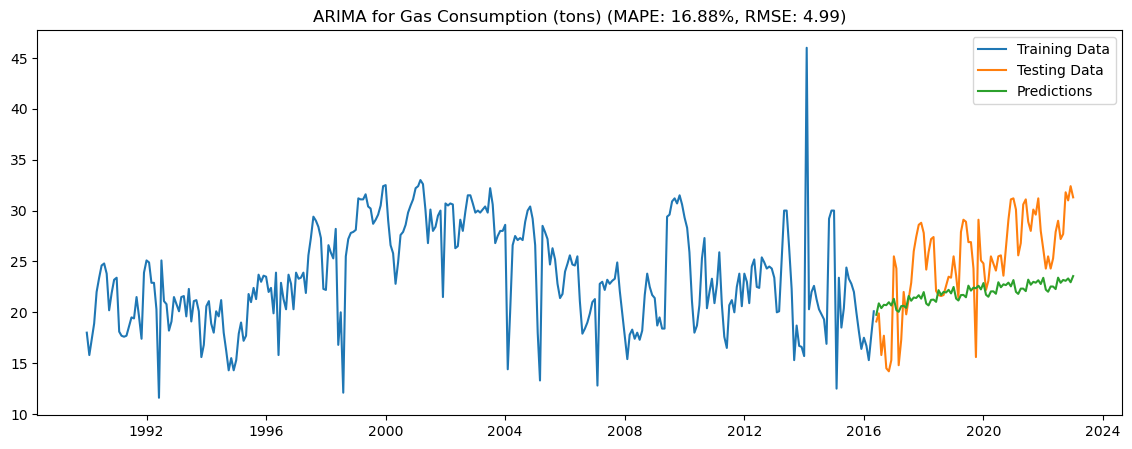


MAPE for Electricity Consumption (MWh): 2.77%
RMSE for Electricity Consumption (MWh): 37.64


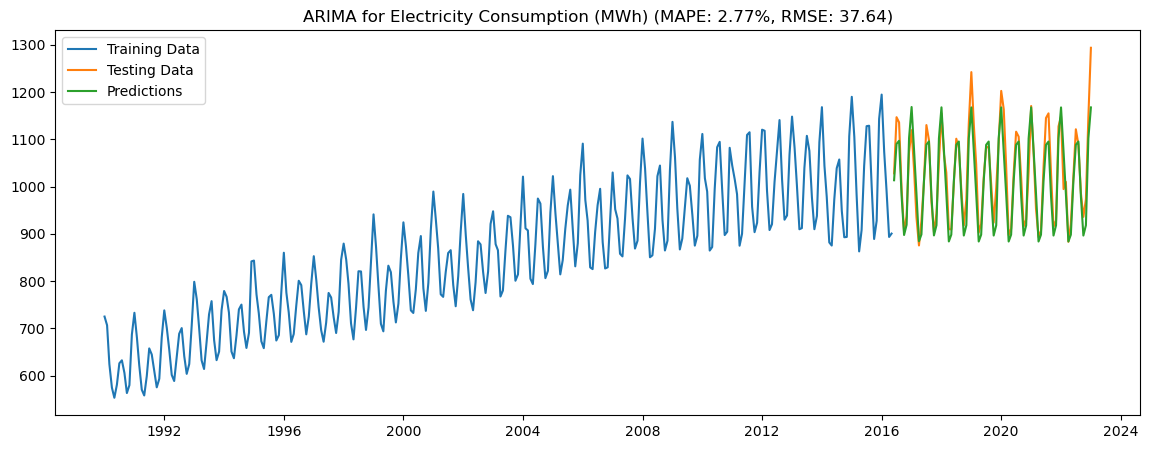


MAPE for Water Consumption (tons): 24.00%
RMSE for Water Consumption (tons): 121.25


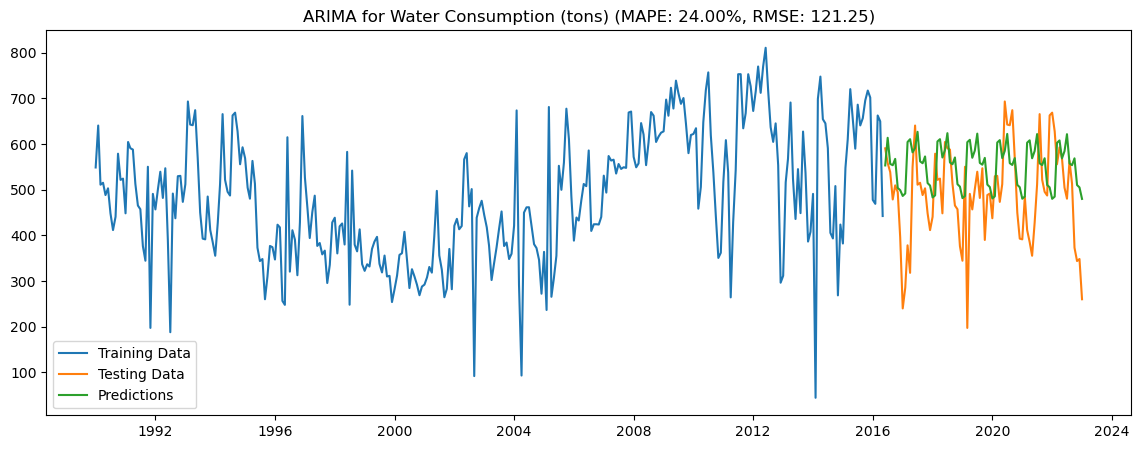

In [151]:
# for loop to iterate through each column in the dataset and fit model
for row in dataset.columns:  
    
    # split the data into training and testing sets (80/20 split)
    split_index = int(len(dataset) * 0.8)
    train_data = dataset.iloc[:split_index][row]
    test_data = dataset.iloc[split_index:][row]

    # define order and seasonal_order
    order = (2, 0, 1)           # (p, d, q) --> non-seasonal order
    seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s) --> seasonal order (12 for monthly data)

    # fit SARIMAX model with defined orders
    sarimax_model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit()

    # corrected start and end indices for prediction
    pred = sarimax_model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

    # calculate MAPE and RMSE
    mape = mean_absolute_percentage_error(test_data, pred)
    rmse = np.sqrt(mean_squared_error(test_data, pred))

    # printing calculated metrics
    print(f'\nMAPE for {row}: {mape*100:.2f}%')
    print(f'RMSE for {row}: {rmse:.2f}')

    # defining subplots
    fig, ax = plt.subplots(figsize=(14, 5))

    # plotting results
    ax.plot(train_data.index, train_data, label='Training Data') 
    ax.plot(test_data.index, test_data, label='Testing Data')   
    ax.plot(test_data.index, pred, label='Predictions')       

    # labels
    ax.set_title(f'SARIMAX for {row} (MAPE: {mape*100:.2f}%, RMSE: {rmse:.2f})')
    ax.legend()

    # show the plot
    plt.show()

#

# HOLT WINTERS 


MAPE for Gas Consumption (tons): 26.35%
RMSE for Gas Consumption (tons): 7.64


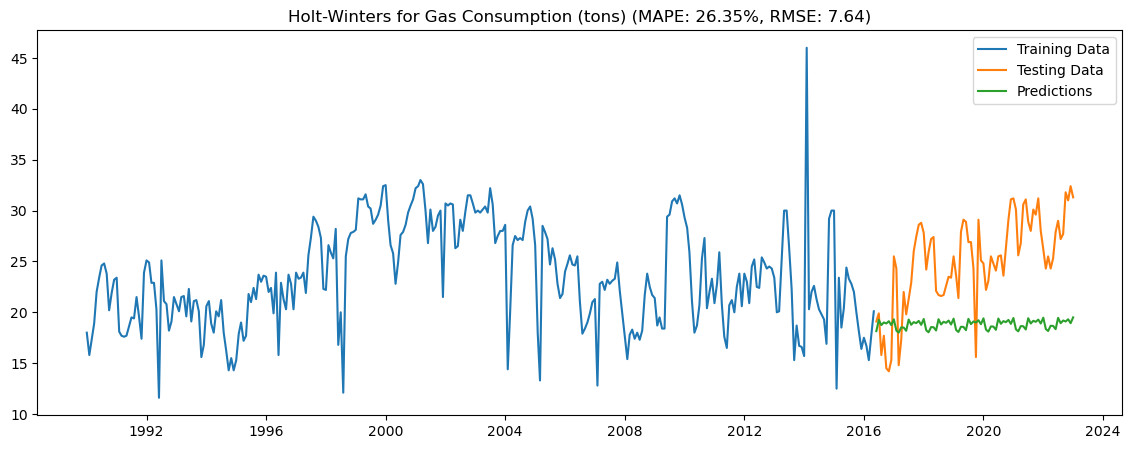


MAPE for Electricity Consumption (MWh): 4.29%
RMSE for Electricity Consumption (MWh): 52.41


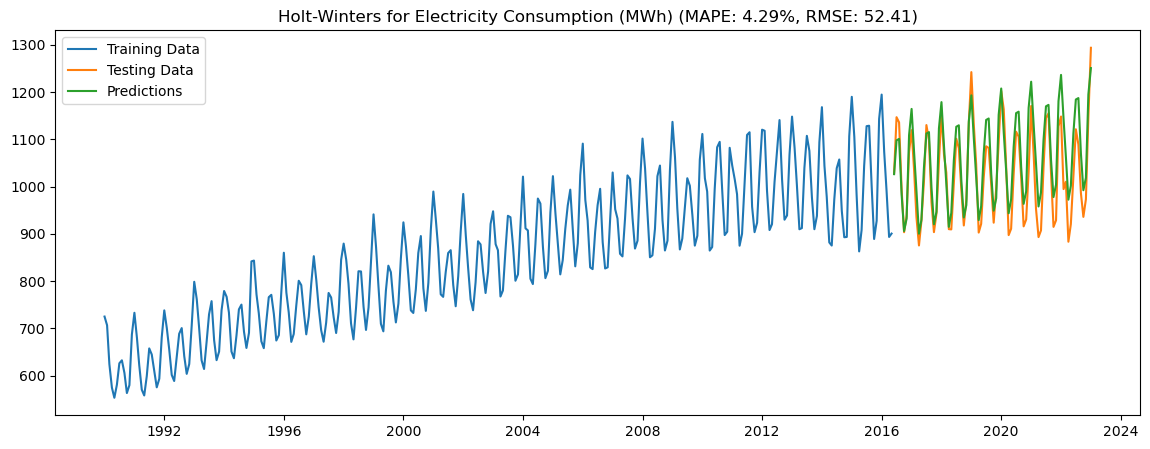


MAPE for Water Consumption (tons): 22.93%
RMSE for Water Consumption (tons): 118.95


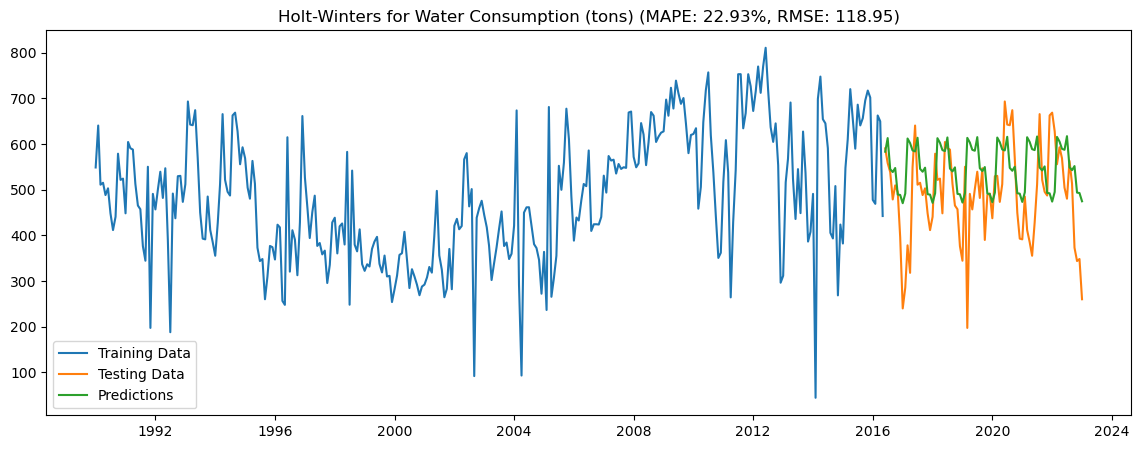

In [155]:
# for loop to iterate through each column in the dataset and fit model
for row in dataset.columns:  
    
    # split the data into training and testing sets (80/20 split)
    split_index = int(len(dataset) * 0.8)
    train_data = dataset.iloc[:split_index][row]
    test_data = dataset.iloc[split_index:][row]

    # fit Holt-Winters model 
    model = ExponentialSmoothing(train_data, 
                                 trend='add', 
                                 seasonal='add', 
                                 seasonal_periods=12).fit() # Example: Additive model for monthly data

    # predict on test data
    pred = model.forecast(len(test_data)) 

    # calculate MAPE and RMSE
    mape = mean_absolute_percentage_error(test_data, pred)
    rmse = np.sqrt(mean_squared_error(test_data, pred))

    # printing calculated metrics
    print(f'\nMAPE for {row}: {mape*100:.2f}%')
    print(f'RMSE for {row}: {rmse:.2f}')

    # defining subplots
    fig, ax = plt.subplots(figsize=(14, 5))

    # plotting results
    ax.plot(train_data.index, train_data, label='Training Data')
    ax.plot(test_data.index, test_data, label='Testing Data')
    ax.plot(test_data.index, pred, label='Predictions')

    # labels
    ax.set_title(f'Holt-Winters for {row} (MAPE: {mape*100:.2f}%, RMSE: {rmse:.2f})')
    ax.legend()

    # show the plot
    plt.show()

#

# HYPERPARAMETER TUNING + FORECASTING
## Final chosen best model is SARIMAX, now we do hyper parameter tune it to make it better
*We tune models to get the lowest MAPE possible as MAPE is easier to view than compared to RMSE*

In [163]:
# taking out each column of data before tuning so that we can tune separately for each data
gasData = dataset[['Gas Consumption (tons)']]
electricityData = dataset[['Electricity Consumption (MWh)']]
waterData = dataset[['Water Consumption (tons)']]

#

# TUNING SARIMAX FOR GAS CONSUMPTION

In [193]:
# function to tune sarimax for gas consumption
def tune_sarimax(data, param_grid):

    # 80/20 train test split
    split_index = int(len(data) * 0.8)
    train_data = data.iloc[:split_index]
    test_data = data.iloc[split_index:]

    # defining variables to store best metrics
    best_mape = np.inf
    best_order = None
    best_seasonal_order = None

    # loop to tune hyperparameters
    for params in ParameterGrid(param_grid):

        # defining order and seasonal_order
        order = params['order']
        seasonal_order = params['seasonal_order']

        # fit model with train data with each hyperparameter and predict
        model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
        predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

        # calculate metrics
        mape = mean_absolute_percentage_error(test_data, predictions) * 100

        # replaces current best metrics until loop is finished
        if mape < best_mape :
            best_mape = mape
            best_order = order
            best_seasonal_order = seasonal_order
            model = model

    # return best metrics after hyperparameter tuning
    return best_mape, best_order, best_seasonal_order, model

# defining parameters to tune in param_grid
param_grid = {
    'order': [(1, 0, 1), (2, 0, 1), (2, 0, 2), (1, 1, 1), (2, 1, 1), (2, 1, 2), (3, 0, 2)],
    'seasonal_order': [(0, 1, 1, 12), (1, 1, 1, 12), (0, 2, 1, 12), (1, 2, 1, 12), (2, 1 ,1, 12)]
}

# get best_model, best_score and best_params after tuning SARIMAX model
best_mape, best_order, best_seasonal_order, model = tune_sarimax(gasData, param_grid)

# printing best metrics and parameters
print(f"Best Hyperparameters (order): {best_order}")
print(f"Best Hyperparameters (seasonal order) : {best_seasonal_order}")
print(f"Best MAPE: {best_mape:.2f}%")
print(f"\nModel Summary:\n{model.summary()}")

Best Hyperparameters (order): (2, 0, 2)
Best Hyperparameters (seasonal order) : (0, 1, 1, 12)
Best MAPE: 14.98%
Model Summary:
                                      SARIMAX Results                                       
Dep. Variable:               Gas Consumption (tons)   No. Observations:                  317
Model:             SARIMAX(3, 0, 2)x(2, 1, [1], 12)   Log Likelihood                -777.618
Date:                              Fri, 14 Feb 2025   AIC                           1573.236
Time:                                      12:38:41   BIC                           1605.885
Sample:                                  01-01-1990   HQIC                          1586.335
                                       - 05-01-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

#

# FORECASTING GAS CONSUMPTION ON BEST HYPERPARAMETERS

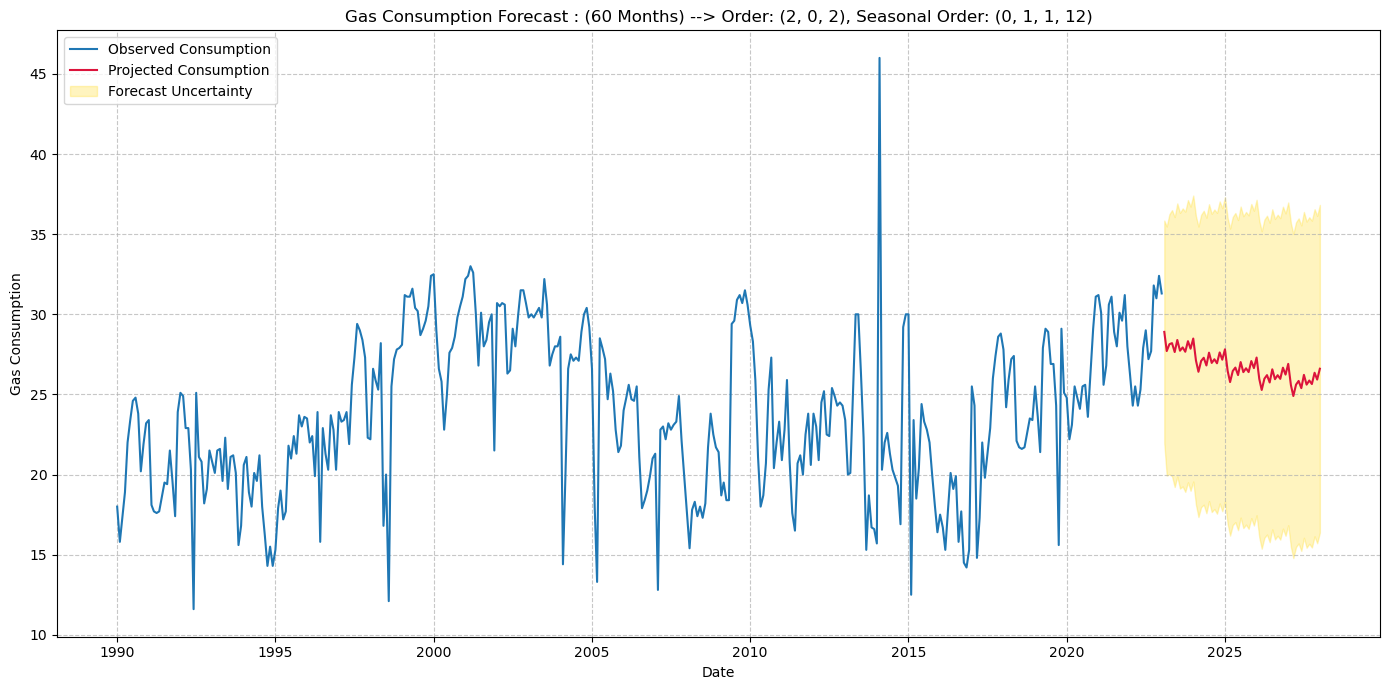

In [195]:
# forecasting on gas data with best parameters

# function to plot the forecast
def plot_sarimax_forecast(data, order, seasonal_order, n_months=60):

    # train on all available data
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)

    # generate future date indices
    last_date = data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_months, freq='M')

    # obtain forecast and confidence intervals
    forecast_result = model.get_forecast(steps=n_months)
    forecast_mean = forecast_result.predicted_mean
    confidence_intervals = forecast_result.conf_int()

    # set figsize
    plt.figure(figsize=(14, 7))

    # past data
    plt.plot(data, label="Observed Consumption")

    # plot the forecast
    plt.plot(future_dates, forecast_mean, label="Projected Consumption", color="crimson")

    # uncertainty bounds
    plt.fill_between(future_dates,
                     confidence_intervals.iloc[:, 0],
                     confidence_intervals.iloc[:, 1],
                     color="gold", alpha=0.25, label="Forecast Uncertainty")

    # labels
    plt.title(f"Gas Consumption Forecast : ({n_months} Months) --> Order: {order}, Seasonal Order: {seasonal_order}")  
    plt.xlabel("Date")
    plt.ylabel("Gas Consumption")
    plt.legend(loc="upper left")

    # plotting the graph
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# best parameters
my_order = (2, 0, 2)       
my_seasonal_order = (0, 1, 1, 12)  

# plot the forecast using the function
plot_sarimax_forecast(gasData, my_order, my_seasonal_order)

#

# TUNING SARIMAX FOR ELECTRICITY CONSUMPTION 

In [196]:
# function to tune sarimax for electricity consumption
def tune_sarimax(data, param_grid):

    # 80/20 train test split
    split_index = int(len(data) * 0.8)
    train_data = data.iloc[:split_index]
    test_data = data.iloc[split_index:]

    # defining variables to store best metrics
    best_mape = np.inf
    best_order = None
    best_seasonal_order = None

    # loop to tune hyperparameters
    for params in ParameterGrid(param_grid):

        # defining order and seasonal_order
        order = params['order']
        seasonal_order = params['seasonal_order']

        # fit model with train data with each hyperparameter and predict
        model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
        predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

        # calculate metrics
        mape = mean_absolute_percentage_error(test_data, predictions) * 100

        # replaces current best metrics until loop is finished
        if mape < best_mape:
            best_mape = mape
            best_order = order
            best_seasonal_order = seasonal_order
            model = model

    # return best metrics after hyperparameter tuning
    return best_mape, best_order, best_seasonal_order, model

# defining parameters to tune in param_grid
param_grid = {
    'order': [(1, 0, 1), (2, 0, 1), (2, 0, 2), (1, 1, 1), (2, 1, 1), (2, 1, 2), (3, 0, 2)],
    'seasonal_order': [(0, 1, 1, 12), (1, 1, 1, 12), (0, 2, 1, 12), (1, 2, 1, 12), (2, 1 ,1, 12)]
}

# get best_model, best_score and best_params after tuning SARIMAX model
best_mape, best_order, best_seasonal_order, model = tune_sarimax(electricityData, param_grid)

# printing best metrics and parameters
print(f"Best Hyperparameters (order): {best_order}")
print(f"Best Hyperparameters (seasonal order) : {best_seasonal_order}")
print(f"Best MAPE: {best_mape:.2f}%")
print(f"Model Summary:\n{model.summary()}")

Best Hyperparameters (order): (3, 0, 2)
Best Hyperparameters (seasonal order) : (2, 1, 1, 12)
Best MAPE: 2.48%
Model Summary:
                                      SARIMAX Results                                       
Dep. Variable:        Electricity Consumption (MWh)   No. Observations:                  317
Model:             SARIMAX(3, 0, 2)x(2, 1, [1], 12)   Log Likelihood               -1258.841
Date:                              Fri, 14 Feb 2025   AIC                           2535.681
Time:                                      12:49:12   BIC                           2568.330
Sample:                                  01-01-1990   HQIC                          2548.779
                                       - 05-01-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------

#

# FORECASTING ELECTRICITY CONSUMPTION ON BEST PARAMETERS

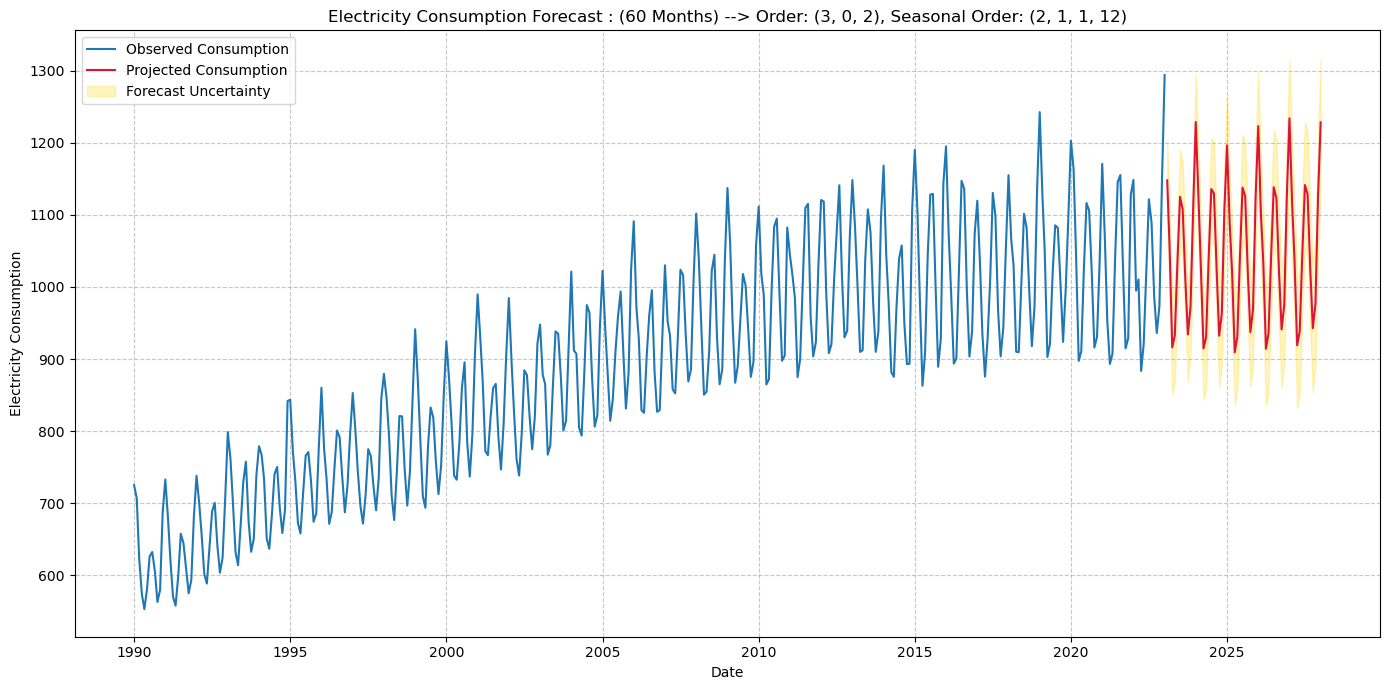

In [197]:
# forecasting on gas data with best parameters

# function to plot the forecast
def plot_sarimax_forecast(data, order, seasonal_order, n_months=60):

    # train on all available data
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)

    # generate future date indices
    last_date = data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_months, freq='M')

    # obtain forecast and confidence intervals
    forecast_result = model.get_forecast(steps=n_months)
    forecast_mean = forecast_result.predicted_mean
    confidence_intervals = forecast_result.conf_int()

    # set figsize
    plt.figure(figsize=(14, 7))

    # past data
    plt.plot(data, label="Observed Consumption")

    # plot the forecast
    plt.plot(future_dates, forecast_mean, label="Projected Consumption", color="crimson")

    # uncertainty bounds
    plt.fill_between(future_dates,
                     confidence_intervals.iloc[:, 0],
                     confidence_intervals.iloc[:, 1],
                     color="gold", alpha=0.25, label="Forecast Uncertainty")

    # labels
    plt.title(f"Electricity Consumption Forecast : ({n_months} Months) --> Order: {order}, Seasonal Order: {seasonal_order}")  
    plt.xlabel("Date")
    plt.ylabel("Electricity Consumption")
    plt.legend(loc="upper left")

    # plotting the graph
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# best parameters
my_order = (3, 0, 2)       
my_seasonal_order = (2, 1, 1, 12)  

# plot the forecast using the function
plot_sarimax_forecast(electricityData, my_order, my_seasonal_order)

#

# TUNING SARIMAX FOR WATER CONSUMPTION

In [198]:
# function to tune sarimax for water consumption
def tune_sarimax(data, param_grid):

    # 80/20 train test split
    split_index = int(len(data) * 0.8)
    train_data = data.iloc[:split_index]
    test_data = data.iloc[split_index:]

    # defining variables to store best metrics
    best_mape = np.inf
    best_order = None
    best_seasonal_order = None

    # loop to tune hyperparameters
    for params in ParameterGrid(param_grid):

        # defining order and seasonal_order
        order = params['order']
        seasonal_order = params['seasonal_order']

        # fit model with train data with each hyperparameter and predict
        model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
        predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

        # calculate metrics
        mape = mean_absolute_percentage_error(test_data, predictions) * 100

        # replaces current best metrics until loop is finished
        if mape < best_mape:
            best_mape = mape
            best_order = order
            best_seasonal_order = seasonal_order
            model = model

    # return best metrics after hyperparameter tuning
    return best_mape, best_order, best_seasonal_order, model

# defining parameters to tune in param_grid
param_grid = {
    'order': [(1, 0, 1), (2, 0, 1), (2, 0, 2), (1, 1, 1), (2, 1, 1), (2, 1, 2), (3, 0, 2)],
    'seasonal_order': [(0, 1, 1, 12), (1, 1, 1, 12), (0, 2, 1, 12), (1, 2, 1, 12), (2, 1 ,1, 12)]
}

# get best_model, best_score and best_params after tuning SARIMAX model
best_mape, best_order, best_seasonal_order, model = tune_sarimax(waterData, param_grid)

# printing best metrics and parameters
print(f"Best Hyperparameters (order): {best_order}")
print(f"Best Hyperparameters (seasonal order) : {best_seasonal_order}")
print(f"Best MAPE: {best_mape:.2f}%")
print(f"Model Summary:\n{model.summary()}")

Best Hyperparameters (order): (3, 0, 2)
Best Hyperparameters (seasonal order) : (2, 1, 1, 12)
Best MAPE: 21.80%
Model Summary:
                                      SARIMAX Results                                       
Dep. Variable:             Water Consumption (tons)   No. Observations:                  317
Model:             SARIMAX(3, 0, 2)x(2, 1, [1], 12)   Log Likelihood               -1699.483
Date:                              Fri, 14 Feb 2025   AIC                           3416.965
Time:                                      12:58:38   BIC                           3449.614
Sample:                                  01-01-1990   HQIC                          3430.064
                                       - 05-01-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

#

# FORECASTING WATER CONSUMPTION ON BEST PARAMETERS

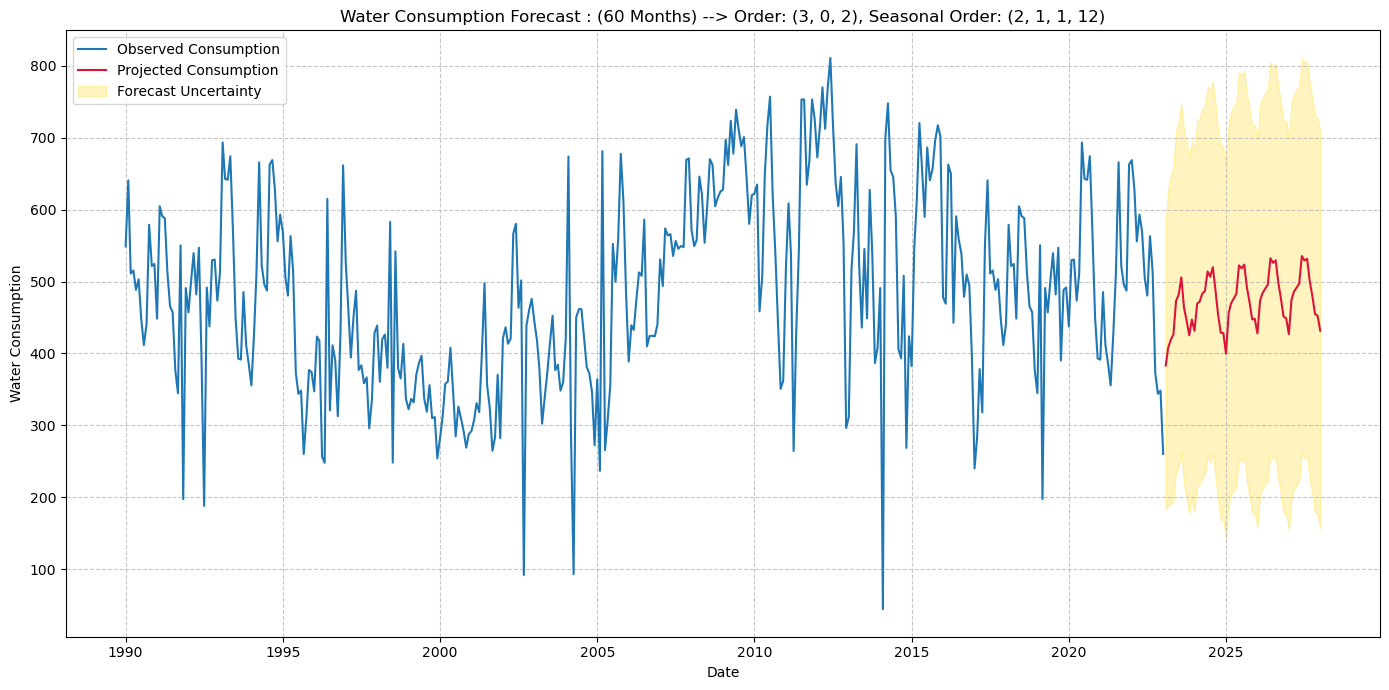

In [200]:
# forecasting on water data with best parameters

# function to plot the forecast
def plot_sarimax_forecast(data, order, seasonal_order, n_months=60):

    # train on all available data
    model = SARIMAX(data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)

    # generate future date indices
    last_date = data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_months, freq='M')

    # obtain forecast and confidence intervals
    forecast_result = model.get_forecast(steps=n_months)
    forecast_mean = forecast_result.predicted_mean
    confidence_intervals = forecast_result.conf_int()

    # set figsize
    plt.figure(figsize=(14, 7))

    # past data
    plt.plot(data, label="Observed Consumption")

    # plot the forecast
    plt.plot(future_dates, forecast_mean, label="Projected Consumption", color="crimson")

    # uncertainty bounds
    plt.fill_between(future_dates,
                     confidence_intervals.iloc[:, 0],
                     confidence_intervals.iloc[:, 1],
                     color="gold", alpha=0.25, label="Forecast Uncertainty")

    # labels
    plt.title(f"Water Consumption Forecast : ({n_months} Months) --> Order: {order}, Seasonal Order: {seasonal_order}")  
    plt.xlabel("Date")
    plt.ylabel("Water Consumption")
    plt.legend(loc="upper left")

    # plotting the graph
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# best parameters
my_order = (3, 0, 2)       
my_seasonal_order = (2, 1, 1, 12)  

# plot the forecast using the function
plot_sarimax_forecast(waterData, my_order, my_seasonal_order)